In [23]:
from sqlalchemy import create_engine
import pandas as pd


engine = create_engine('mysql+pymysql://root:@localhost:3306/PRACTICA')


df_employees = pd.read_sql_table('EM_EMPLEADOS', con=engine)



In [24]:
print(df_employees.columns)

Index(['ID_EMPLEADO', 'TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2',
       'F_NACIMIENTO', 'N_TELEFONO1', 'N_TELEFONO2', 'TX_EMAIL', 'F_ALTA',
       'F_BAJA', 'CX_EDOCIVIL', 'B_FORMACIONU'],
      dtype='object')


Top 5 employees with the most years in the company

In [25]:
df_employees['F_ALTA'] = pd.to_datetime(df_employees['F_ALTA'])
df_employees['F_BAJA'] = pd.to_datetime(df_employees['F_BAJA'])

today = pd.Timestamp.today()
df_employees['F_BAJA'] = df_employees['F_BAJA'].fillna(today)
df_employees['AÑOS_EN_EMPRESA'] = (df_employees['F_BAJA'] - df_employees['F_ALTA']).dt.days / 365

top5_seniority = df_employees.sort_values('AÑOS_EN_EMPRESA', ascending=False).head(5)

top5_seniority


,ID_EMPLEADO,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,F_NACIMIENTO,N_TELEFONO1,N_TELEFONO2,TX_EMAIL,F_ALTA,F_BAJA,CX_EDOCIVIL,B_FORMACIONU,AÑOS_EN_EMPRESA
22,64,99001122K,Francisco,Fuentes,Carrasco,1980-10-10,635456789,635789012,francisco.fuentes@example.com,2005-09-01,2021-08-31 00:00:00.000000,C,N,16.008219
31,73,80809000F,Antonio,Aguilar,Esteban,1984-08-08,636455667,636778890,antonio.aguilar@example.com,2010-05-03,2025-04-13 16:18:47.618786,C,N,14.956164
20,62,77889900L,Miguel,Sanz,Guerrero,1985-04-12,613234567,613567890,miguel.sanz@example.com,2012-07-01,2025-04-13 16:18:47.618786,C,S,12.791781
36,78,76543210N,Raquel,Ferrer,Arias,1987-12-28,691900112,691223345,raquel.ferrer@example.com,2013-07-15,2024-08-31 00:00:00.000000,V,N,11.136986
27,69,40405060A,Jorge,Vargas,Méndez,1989-03-18,691011223,691334455,jorge.vargas@example.com,2014-10-01,2025-04-13 16:18:47.618786,S,N,10.539726


Top 5 most recently hired employees

In [26]:
top5_recent = df_employees.sort_values('F_ALTA', ascending=False).head(5)

top5_recent


,ID_EMPLEADO,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,F_NACIMIENTO,N_TELEFONO1,N_TELEFONO2,TX_EMAIL,F_ALTA,F_BAJA,CX_EDOCIVIL,B_FORMACIONU,AÑOS_EN_EMPRESA
15,57,22334455Z,Noa,Suárez,Ortega,1999-01-20,667788990,667001123,noa.suarez@example.com,2024-03-01,2025-04-13 16:18:47.618786,S,S,1.117808
32,74,90900011P,Isabel,Pascual,Lorenzo,1997-10-12,647566778,647889901,isabel.pascual@example.com,2024-02-01,2025-04-13 16:18:47.618786,S,S,1.197260
11,53,89012345X,Carla,Vázquez,Ramos,1998-10-05,623344556,623667789,carla.vazquez@example.com,2024-01-20,2025-04-13 16:18:47.618786,S,S,1.230137
25,67,20203040R,Aitana,Peña,Flores,1998-05-14,668789012,668012345,aitana.pena@example.com,2023-11-01,2025-04-13 16:18:47.618786,S,N,1.449315
19,61,66778899H,Daniela,Gallego,Iglesias,1997-08-18,602123456,602456789,daniela.gallego@example.com,2023-09-10,2025-02-28 00:00:00.000000,S,S,1.471233


Distribution of years in the company

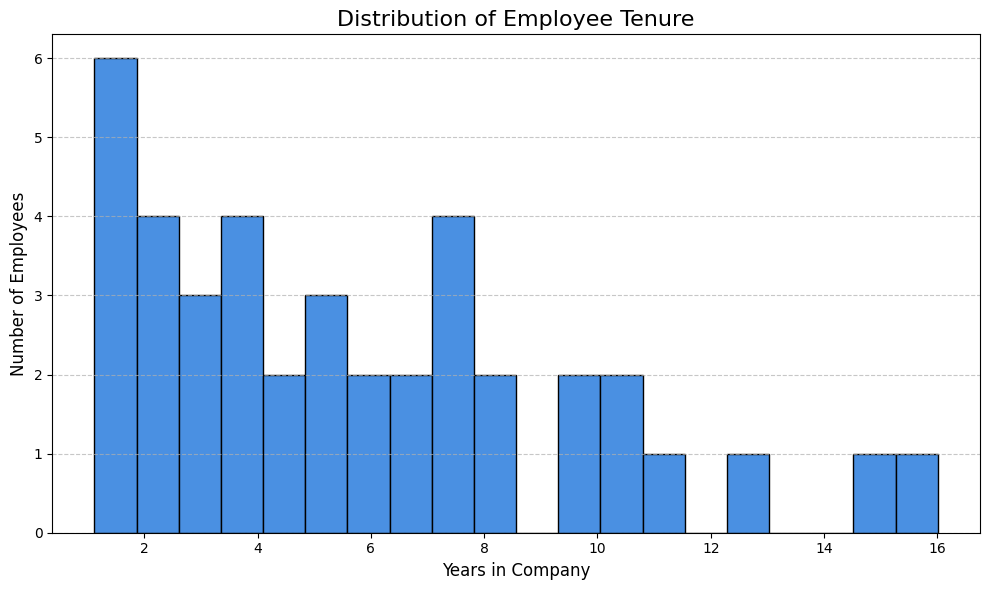

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_employees['AÑOS_EN_EMPRESA'], bins=20, edgecolor='black', color='#4A90E2')
plt.title("Distribution of Employee Tenure", fontsize=16)
plt.xlabel("Years in Company", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Hiring trend per year

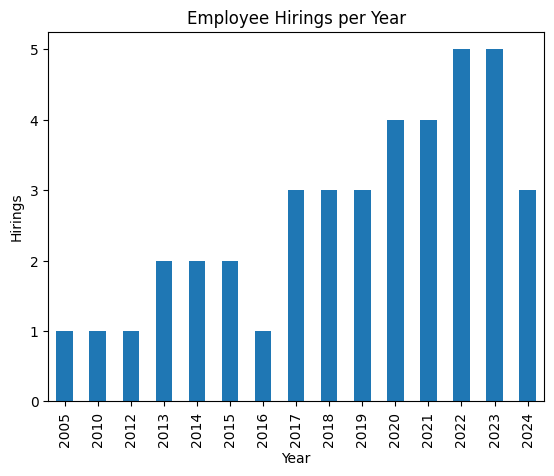

In [28]:
df_employees['AÑO_ALTA'] = df_employees['F_ALTA'].dt.year
altas_por_año = df_employees['AÑO_ALTA'].value_counts().sort_index()

plt.figure()
altas_por_año.plot(kind='bar')
plt.title("Employee Hirings per Year")
plt.xlabel("Year")
plt.ylabel("Hirings")
plt.show()


Termination trend per year

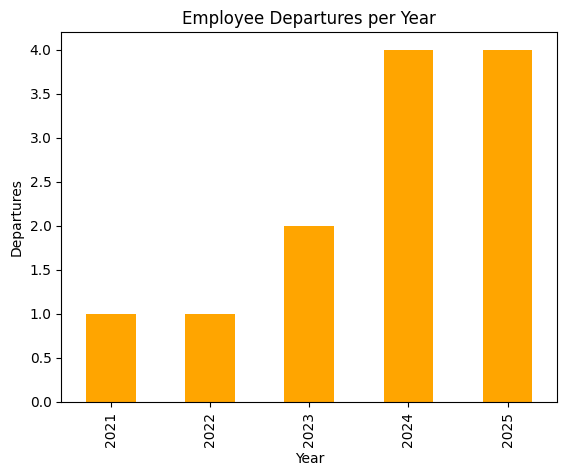

In [29]:
df_employees['AÑO_BAJA'] = df_employees['F_BAJA'].dt.year
bajas_por_año = df_employees[df_employees['F_BAJA'] != today]['AÑO_BAJA'].value_counts().sort_index()

plt.figure()
bajas_por_año.plot(kind='bar', color='orange')
plt.title("Employee Departures per Year")
plt.xlabel("Year")
plt.ylabel("Departures")
plt.show()


Two years of greatest growth/decrease

Years with Highest Employee Growth:
2020    4.0
2022    4.0
Name: count, dtype: float64
Years with Highest Employee Decline:
2025   -4.0
2024   -1.0
Name: count, dtype: float64


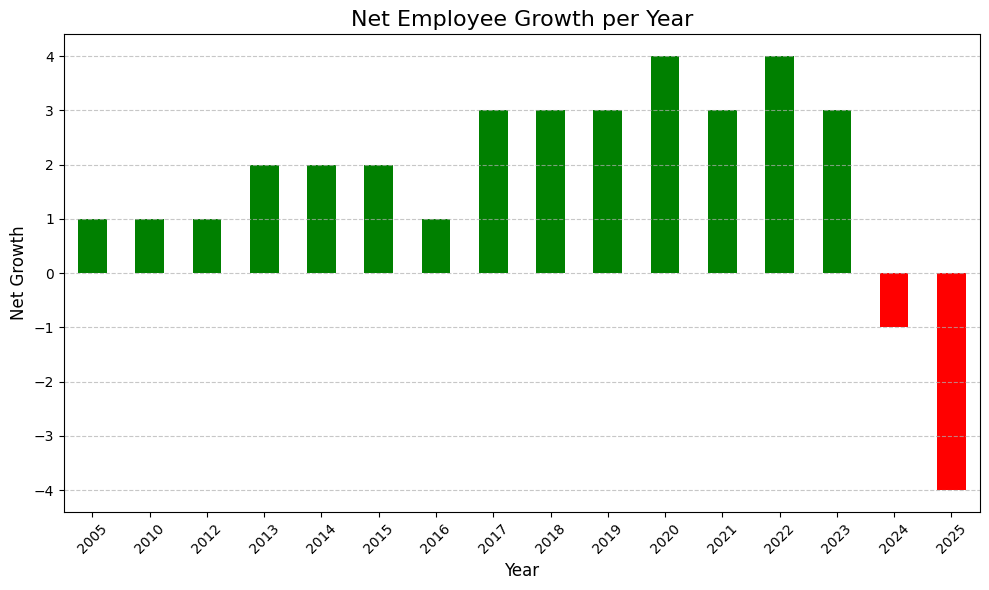

In [30]:
net_growth = altas_por_año.subtract(bajas_por_año, fill_value=0)
top_growth = net_growth.sort_values(ascending=False).head(2)
top_decline = net_growth.sort_values().head(2)


print("Years with Highest Employee Growth:")
print(top_growth)

print("Years with Highest Employee Decline:")
print(top_decline)

plt.figure(figsize=(10, 6))
net_growth.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in net_growth])
plt.title("Net Employee Growth per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Growth", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Civil status distribution (Solteros vs Casados)

In [31]:
plt.figure(figsize=(6, 6))
df_employees['CX_EDOCIVIL'].map({'S': 'Soltero', 'C': 'Casado'}) \
    .value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                         colors=['

plt.title("Distribución Estado Civil de Empleados", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()


SyntaxError: unterminated string literal (detected at line 4) (184422146.py, line 4)

Age distribution + mean and std

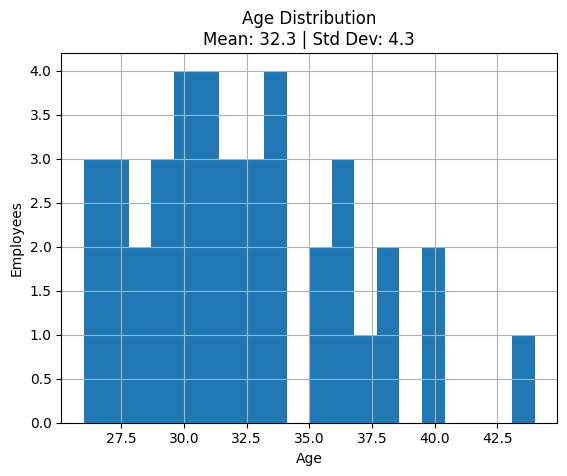

In [ ]:
df_employees['F_NACIMIENTO'] = pd.to_datetime(df_employees['F_NACIMIENTO'])
df_employees['EDAD'] = ((today - df_employees['F_NACIMIENTO']).dt.days / 365).astype(int)

edad_media = df_employees['EDAD'].mean()
edad_std = df_employees['EDAD'].std()

plt.figure()
df_employees['EDAD'].hist(bins=20)
plt.title(f"Age Distribution\nMean: {edad_media:.1f} | Std Dev: {edad_std:.1f}")
plt.xlabel("Age")
plt.ylabel("Employees")
plt.show()
